# Decision Tree: Credit

## Background

This dataset contains information on loans information obtained from a credit agency.

This dataset include 1,000 examples on loans, plus a set of numeric and nominal features indicating the characteristics of the load and the loan applicant.

The target variable indicates if the loan went to default


## Data dictionary



**checking_balance**: Status of existing checking account

A11 : ... < 0 DM

A12 : 0 <= ... < 200 DM

A13 : ... >= 200 DM / salary assignments for at least 1 year

A14 : no checking account


**months_loan_duration**: (numerical)Duration in month

**credit_history**: Credit history

A30 : no credits taken/ all credits paid back duly

A31 : all credits at this bank paid back duly

A32 : existing credits paid back duly till now

A33 : delay in paying off in the past

A34 : critical account/ other credits existing (not at this bank)

**purpose**: Purpose

A40 : car (new)

A41 : car (used)

A42 : furniture/equipment

A43 : radio/television

A44 : domestic appliances

A45 : repairs

A46 : education

A47 : (vacation - does not exist?)

A48 : retraining

A49 : business

A410 : others

**amount**: Credit amount

**saving_balance**: (qualitative)	Savings account/bonds

A61 : ... < 100 DM

A62 : 100 <= ... < 500 DM

A63 : 500 <= ... < 1000 DM

A64 : .. >= 1000 DM

A65 : unknown/ no savings account

**employment_duration**:Present employment since

A71 : unemployed

A72 : ... < 1 year

A73 : 1 <= ... < 4 years

A74 : 4 <= ... < 7 years

A75 : .. >= 7 years

**percent_of_income**: Installment rate in percentage of disposable income


**years_at_residence**: Present residence since


**age**: Age in years

**other credit**: Other installment plans

A141 : bank

A142 : stores

A143 : none

**housing**: (qualitative)	Housing

A151 : rent

A152 : own

A153 : for free

**existing_loans_count**: Number of existing credits at this bank

**job**: Job

A171 : unemployed/ unskilled - non-resident

A172 : unskilled - resident

A173 : skilled employee / official

A174 : management/ self-employed/

highly qualified employee/ officer

**dependents**: Number of people being liable to provide maintenance for

**phone**: Telephone

A191 : none

A192 : yes, registered under the customer name


**default**: no and yes





## Data Preprocessing & Cleaning


In [1]:
import pandas as pd

# work with colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
path = '/content/drive/My Drive/CIS 412 Session C/Datafiles/credit.csv'
default = pd.read_csv(path)

In [3]:
default.shape

(1000, 17)

In [4]:
default.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,A11,6,A34,A43,1169,A65,A75,4,4,67,A143,A152,2,A173,1,A192,no
1,A12,48,A32,A43,5951,A61,A73,2,2,22,A143,A152,1,A173,1,A191,yes
2,A14,12,A34,A46,2096,A61,A74,2,3,49,A143,A152,1,A172,2,A191,no
3,A11,42,A32,A42,7882,A61,A74,2,4,45,A143,A153,1,A173,2,A191,no
4,A11,24,A33,A40,4870,A61,A73,3,4,53,A143,A153,2,A173,2,A191,yes


In [5]:
default.dtypes

,0
checking_balance,object
months_loan_duration,int64
credit_history,object
purpose,object
amount,int64
savings_balance,object
employment_duration,object
percent_of_income,int64
years_at_residence,int64
age,int64


In [6]:
default.isnull().sum()

,0
checking_balance,0
months_loan_duration,0
credit_history,0
purpose,0
amount,0
savings_balance,0
employment_duration,0
percent_of_income,0
years_at_residence,0
age,0


In [7]:
default['default'].value_counts()

,count
default,
no,700
yes,300


In [8]:
predictors = default.iloc[:, 0:16]
X = pd.get_dummies(predictors,drop_first=True, dtype=int)
X.head()


#X = default.drop('default', axis=1)
#y = default['default']

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_A12,checking_balance_A13,checking_balance_A14,...,employment_duration_A74,employment_duration_A75,other_credit_A142,other_credit_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192
0,6,1169,4,4,67,2,1,0,0,0,...,0,1,0,1,1,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,1,0,0,1,1,0,1,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [9]:
#Encoding target variable
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(default['default'])
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

#### We split it into a training and a test test. We use the training set to build the model, and use the test set to test/evaluate the model.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

## a test of randon_state

#test_series = pd.Series(range(10))
#test_series
#size30split = train_test_split(test_series, test_size = .3,random_state=0)
#size30split

In [15]:
## a test of randon_state
import pandas as pd

test_series = pd.Series(range(10))
test_series


,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [11]:
from sklearn.model_selection import train_test_split

size30split = train_test_split(test_series, test_size = .3,random_state=0)
size30split

[9    9
 1    1
 6    6
 7    7
 3    3
 0    0
 5    5
 dtype: int64,
 2    2
 8    8
 4    4
 dtype: int64]

## Create a Decision Tree Model

#### Then we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure).

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0, criterion="entropy")

In [17]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
#print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

print('Accuracy on training set:',tree.score(X_train, y_train))

Accuracy on training set: 1.0


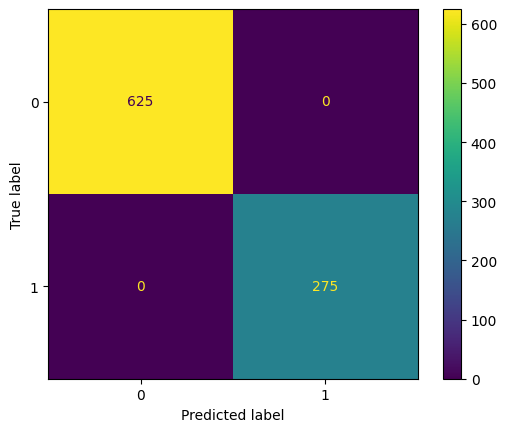

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(tree, X_train, y_train)

#### We need to evaluate decision tree model on test set.

In [20]:
y_pred = tree.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy on training set:',tree.score(X_train, y_train))
print("Accuracy on test set:",accuracy_score(y_pred, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.74


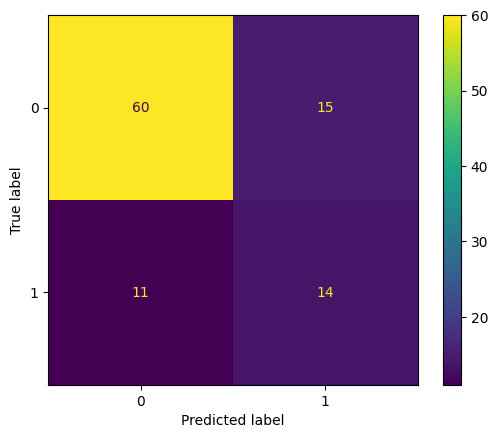

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=tree.classes_)
disp.plot()

plt.show()
#ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
#ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

#### The issue of overfitting

The accuracy on the training set is close to 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is  worse than for the decision tree model on the training set.

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=6. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [23]:
tree_pruned = DecisionTreeClassifier(max_depth=6, random_state=0, criterion= "entropy")
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

In [24]:
#from sklearn.metrics import accuracy_score
print("Accuracy on training set:",round(tree_pruned.score(X_train, y_train),3))
print("Accuracy on test set:",accuracy_score(y_pruned_pred, y_test))

Accuracy on training set: 0.793
Accuracy on test set: 0.76


In [25]:
# set max_depth as a range
import numpy as np


# Range of max_depth values to test
max_depth_range = range(1, 11)

# Lists to store the training and test accuracies for each max_depth
train_accuracies = []
test_accuracies = []

# Iterate through max_depth values
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0, criterion= "entropy")
    # Train the model on the training data
    clf.fit(X_train, y_train)

    # Evaluate the model on the training data
    train_accuracy = clf.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Evaluate the model on the test data
    test_accuracy = clf.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

    print(f"Max Depth: {depth}, Training Accuracy: {train_accuracy:.3f}, Test Accuracy: {test_accuracy:.3f}")

Max Depth: 1, Training Accuracy: 0.694, Test Accuracy: 0.750
Max Depth: 2, Training Accuracy: 0.694, Test Accuracy: 0.750
Max Depth: 3, Training Accuracy: 0.720, Test Accuracy: 0.770
Max Depth: 4, Training Accuracy: 0.747, Test Accuracy: 0.780
Max Depth: 5, Training Accuracy: 0.773, Test Accuracy: 0.790
Max Depth: 6, Training Accuracy: 0.793, Test Accuracy: 0.760
Max Depth: 7, Training Accuracy: 0.809, Test Accuracy: 0.770
Max Depth: 8, Training Accuracy: 0.839, Test Accuracy: 0.650
Max Depth: 9, Training Accuracy: 0.868, Test Accuracy: 0.670
Max Depth: 10, Training Accuracy: 0.889, Test Accuracy: 0.670


## Visualizing and analyzing the tree



In [26]:
# variable importance in decision tree
importance = pd.DataFrame(tree_pruned.feature_importances_, index = X.columns, columns = ["Importance"])
importance.sort_values(by = "Importance", ascending = False)

,Importance
checking_balance_A14,0.258464
months_loan_duration,0.129132
amount,0.128431
age,0.082267
purpose_A41,0.069784
credit_history_A34,0.043821
other_credit_A143,0.043813
savings_balance_A65,0.035425
employment_duration_A74,0.029092
credit_history_A31,0.028832


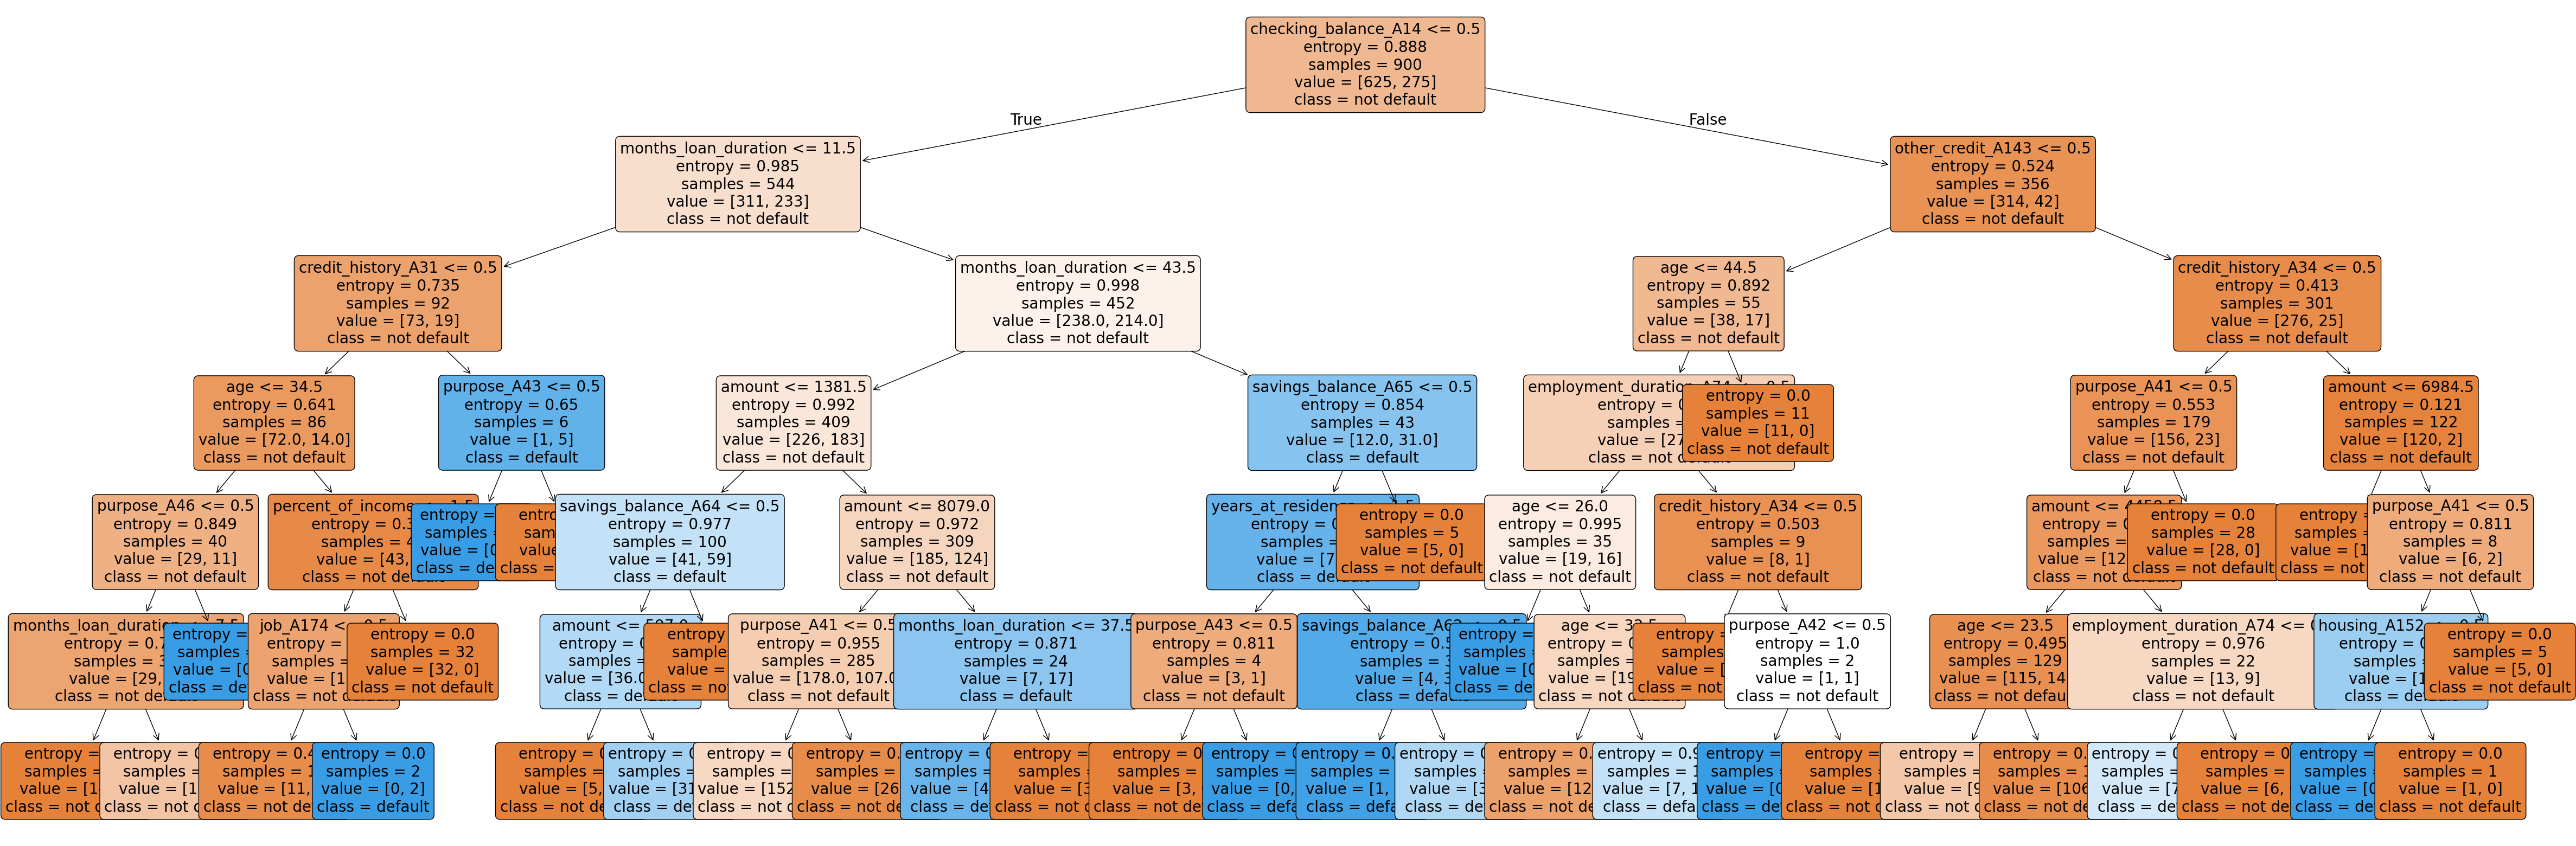

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(60,20))
display_tree = plot_tree(tree_pruned,
              feature_names=X.columns,
              class_names=["not default", "default"],
              filled=True,
              rounded=True,
              fontsize=20)

In [30]:
fig.savefig("/content/drive/My Drive/decision_tree.png")

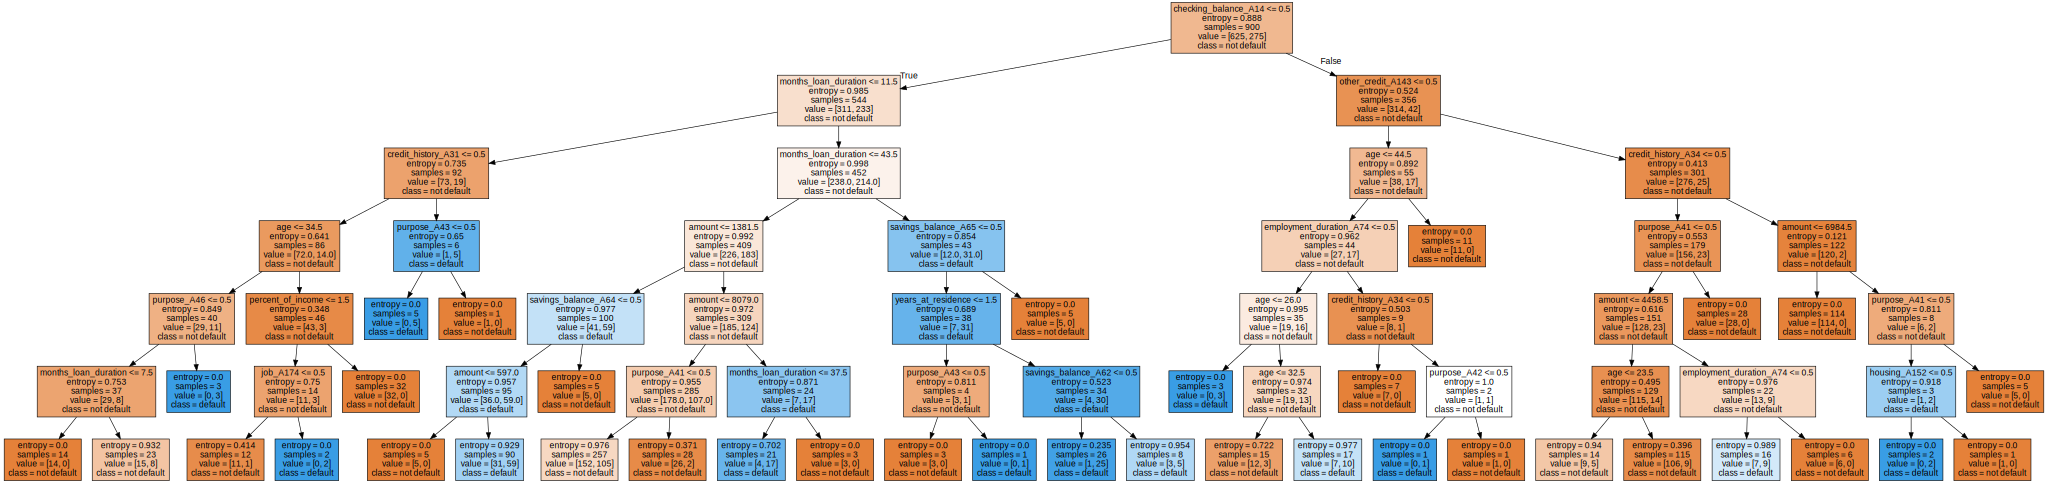

In [32]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree_pruned,
                                feature_names=X.columns,
                                class_names=["not default", "default"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph
#graph.render(directory='C:/Users/xsha3/Downloads', view=True)

In [34]:
from sklearn.tree import export_text
rules = export_text(tree_pruned, feature_names=list(X.columns))
print(rules)

|--- checking_balance_A14 <= 0.50
|   |--- months_loan_duration <= 11.50
|   |   |--- credit_history_A31 <= 0.50
|   |   |   |--- age <= 34.50
|   |   |   |   |--- purpose_A46 <= 0.50
|   |   |   |   |   |--- months_loan_duration <= 7.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- months_loan_duration >  7.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- purpose_A46 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  34.50
|   |   |   |   |--- percent_of_income <= 1.50
|   |   |   |   |   |--- job_A174 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- job_A174 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- percent_of_income >  1.50
|   |   |   |   |   |--- class: 0
|   |   |--- credit_history_A31 >  0.50
|   |   |   |--- purpose_A43 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- purpose_A43 >  0.50
|   |   |   |   |--- class: 0
|   |--- months_loan_duration >  11.50
|   |   |--- months_loan_d

In [28]:
# probability estimation
tree_pruned.predict_proba(X_test)

array([[0.59143969, 0.40856031],
       [0.92173913, 0.07826087],
       [0.92173913, 0.07826087],
       [0.59143969, 0.40856031],
       [0.4375    , 0.5625    ],
       [0.4375    , 0.5625    ],
       [1.        , 0.        ],
       [0.92173913, 0.07826087],
       [1.        , 0.        ],
       [0.375     , 0.625     ],
       [0.19047619, 0.80952381],
       [0.59143969, 0.40856031],
       [0.92857143, 0.07142857],
       [0.59143969, 0.40856031],
       [0.59143969, 0.40856031],
       [0.        , 1.        ],
       [0.59143969, 0.40856031],
       [1.        , 0.        ],
       [0.59143969, 0.40856031],
       [1.        , 0.        ],
       [0.59143969, 0.40856031],
       [0.34444444, 0.65555556],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.03846154, 0.96153846],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.03846154, 0.96153846],
       [1.

In [29]:
y_pruned_pred_proba = tree_pruned.predict_proba(X_test)[:,1]
y_pruned_pred_proba_df = pd.DataFrame(y_pruned_pred_proba, columns = ["Predicted Probability to Default"])
y_pruned_pred_proba_df.to_csv('/content/drive/My Drive/output.csv')